In [23]:
# Environment setup
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from PIL import ImageFont, ImageDraw, Image, ImageFilter
import Lib
from Lib import add_noise_img, ImgData, ImgSize, Fonts, MakeDataset, ShowDataImage, Fonts_abbr, MakeDatasetCycle, ShowDataImageCycle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import shuffle
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import collections
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

# Synthesizing Data

In [65]:
#build dataset
x,y=MakeDataset(N=13000, std_min=50, std_max=75, mean=0, strech_std=0.2, offset_std=0.5, rotation_std=10) 
#ShowDataImage((x,y))
#print(x,y)
#x, y = shuffle(x, y, random_state=10)
#ShowDataImage((x,y))

# Random Forest

In [6]:
#Split The Data Into Train And Test Sets
#print(np.count_nonzero(y == 0))
#print(np.count_nonzero(y == 1))
accuracies = []
for j in range(100):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y)
    #ShowDataImage((X_test,y_test))
    #print(y_test)
    #print(np.count_nonzero(y_test == 0))
    #print(np.count_nonzero(y_test == 1))
    # Build A Random Forest Classifier
    RF_default = RandomForestClassifier()
    RF_default.fit(X_train, y_train.ravel())

    #Predict
    preds = RF_default.predict(X_test)
    accuracy = accuracy_score(y_test,preds)
    accuracies.append(accuracy)
    average_accuracy = np.around(np.array(accuracies).mean(axis=0),4)
#Check The Accuracy Of The Model
print("Accuracy of Random Forest with Default Settings:", average_accuracy)


Accuracy of Random Forest with Default Settings: 0.6552


Confusion matrix of Random Forest with Default Settings


Text(18.999999999999993, 0.5, 'Predicted label')

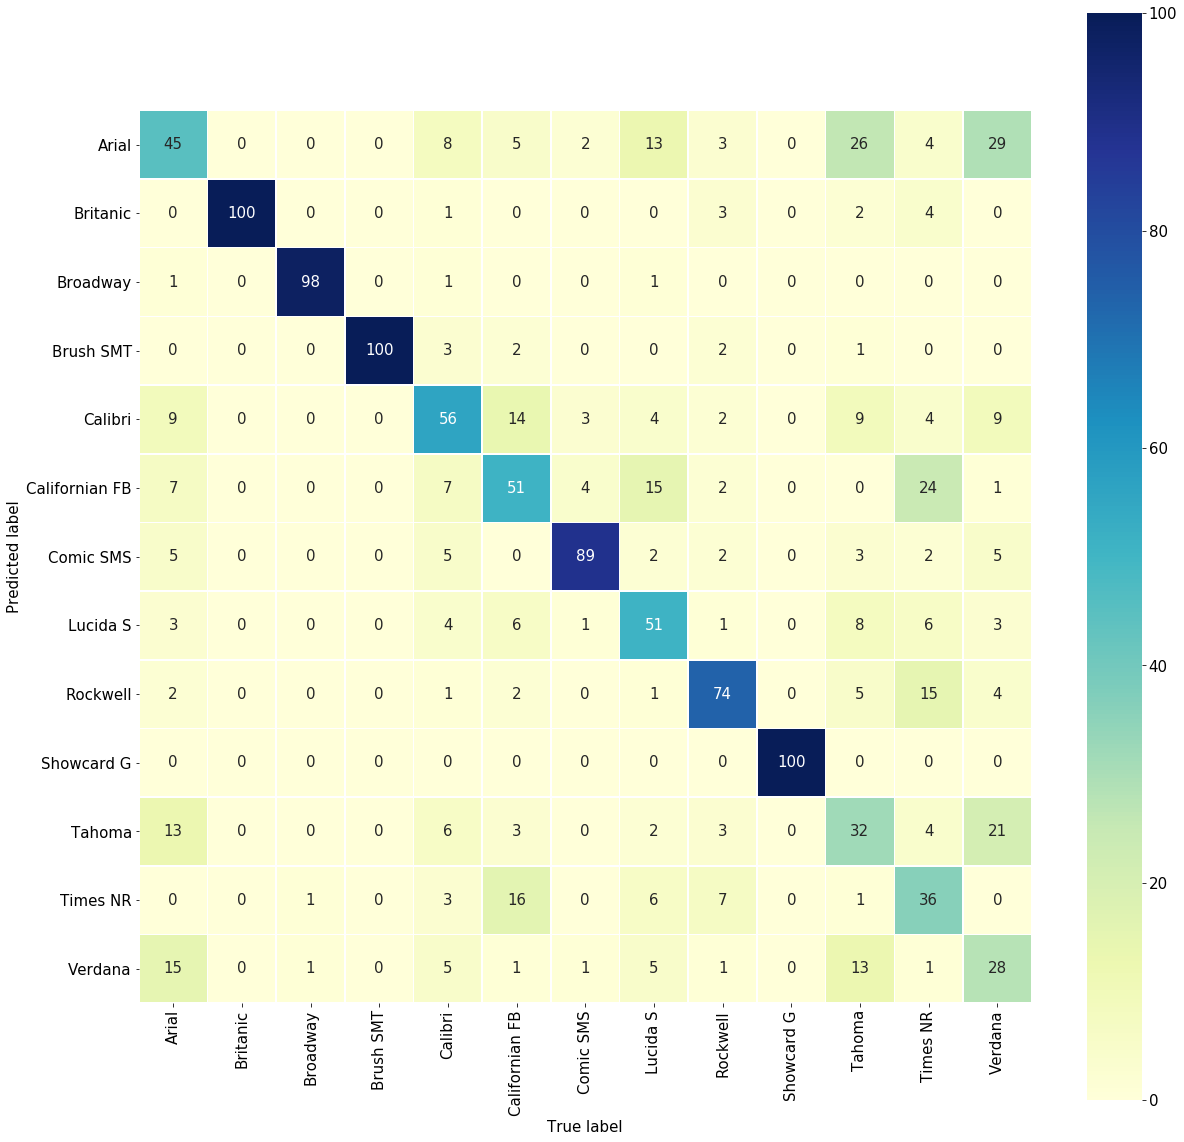

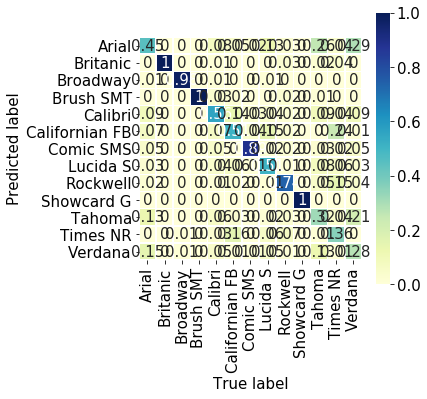

In [10]:
#Create confusion matrix
print('Confusion matrix of Random Forest with Default Settings')
#print(y_test.ravel())
#print(preds)
#print(Fonts[y_test.ravel()])
y_test_fontlabels = []
preds_fontlabels = []
for i in y_test.ravel():
    y_test_fontlabels.append(Fonts[int(i)])
for i in preds:
    preds_fontlabels.append(Fonts[int(i)])
#print(y_test_fontlabels)
#print(preds_fontlabels)
#pd.crosstab(a, b, rownames=['a'], colnames=['b'])
mat = confusion_matrix(y_test_fontlabels, preds_fontlabels, labels=Fonts)
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,20))
sns.heatmap(mat.T, square=True, annot=True, fmt='g', xticklabels=Fonts_abbr, yticklabels=Fonts_abbr, linewidths=.5, cmap="YlGnBu")
plt.xlabel('True label')
plt.ylabel('Predicted label')
mat = mat / mat.astype(np.float).sum(axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, xticklabels=Fonts_abbr, yticklabels=Fonts_abbr, linewidths=.5, cmap="YlGnBu")
plt.xlabel('True label')
plt.ylabel('Predicted label')
#print(mat.T)

# Random Forest Optimization

<Figure size 432x288 with 0 Axes>

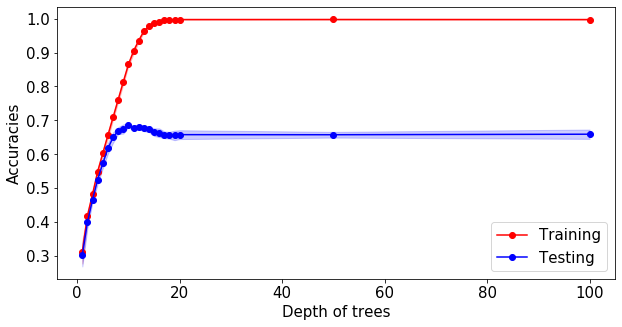

In [12]:
# Effects of the depth of the trees
# Repeated random sub-sampling

tree_depth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,50,100]
training_accuracies = []
testing_accuracies = []

for j in range(10):
    training_accuracy = []
    testing_accuracy = []
    for i in tree_depth:
        clf = RandomForestClassifier(max_depth=i)
        clf.fit(X_train, y_train.ravel())
        training_preds = clf.predict(X_train)
        preds = clf.predict(X_test)
        #print(f"============= For tree depth of {i} ===============")
        #print(f"Training accuracy =", accuracy_score(y_train,training_preds))
        #print(f"Testing accuracy =", accuracy_score(y_test,preds))
        training_accuracy.append(accuracy_score(y_train,training_preds))
        testing_accuracy.append(accuracy_score(y_test,preds))
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)
#print(training_accuracies)
training_accuracy_nparray = np.array(training_accuracies)
testing_accuracy_nparray = np.array(testing_accuracies)
plt.clf()
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.plot(tree_depth, training_accuracy_nparray.mean(axis=0), 'ro-', label='Training')
plt.plot(tree_depth, testing_accuracy_nparray.mean(axis=0), 'bo-', label='Testing')
plt.fill_between(tree_depth, training_accuracy_nparray.mean(axis=0) - training_accuracy_nparray.std(axis=0), training_accuracy_nparray.mean(axis=0) + training_accuracy_nparray.std(axis=0),
                 color='red', alpha=0.2)
plt.fill_between(tree_depth, testing_accuracy_nparray.mean(axis=0) - testing_accuracy_nparray.std(axis=0), testing_accuracy_nparray.mean(axis=0) + testing_accuracy_nparray.std(axis=0),
                 color='blue', alpha=0.2)
plt.xlabel('Depth of trees')
plt.ylabel('Accuracies')
plt.legend(loc='lower right')
plt.show()

<Figure size 432x288 with 0 Axes>

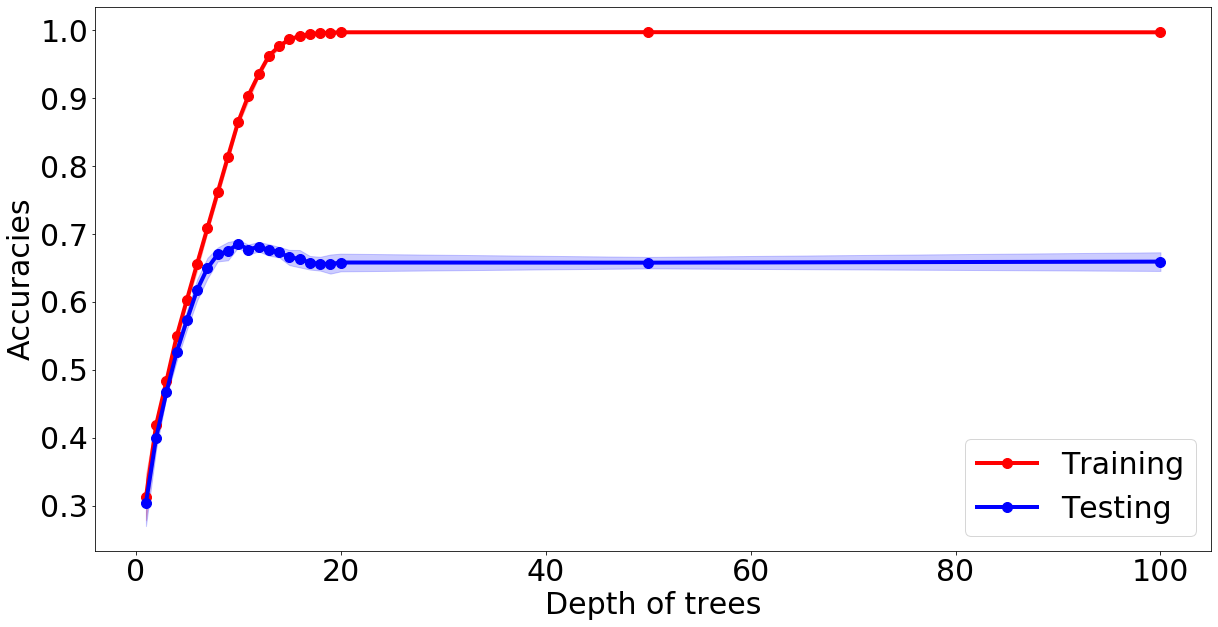

In [21]:
plt.clf()
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(20,10))
plt.plot(tree_depth, training_accuracy_nparray.mean(axis=0), 'ro-', label='Training',linewidth=4.0, markersize=10)
plt.plot(tree_depth, testing_accuracy_nparray.mean(axis=0), 'bo-', label='Testing',linewidth=4.0, markersize=10)
plt.fill_between(tree_depth, training_accuracy_nparray.mean(axis=0) - training_accuracy_nparray.std(axis=0), training_accuracy_nparray.mean(axis=0) + training_accuracy_nparray.std(axis=0),
                 color='red', alpha=0.2)
plt.fill_between(tree_depth, testing_accuracy_nparray.mean(axis=0) - testing_accuracy_nparray.std(axis=0), testing_accuracy_nparray.mean(axis=0) + testing_accuracy_nparray.std(axis=0),
                 color='blue', alpha=0.2)
plt.xlabel('Depth of trees')
plt.ylabel('Accuracies')
plt.legend(loc='lower right')
plt.show()

<Figure size 432x288 with 0 Axes>

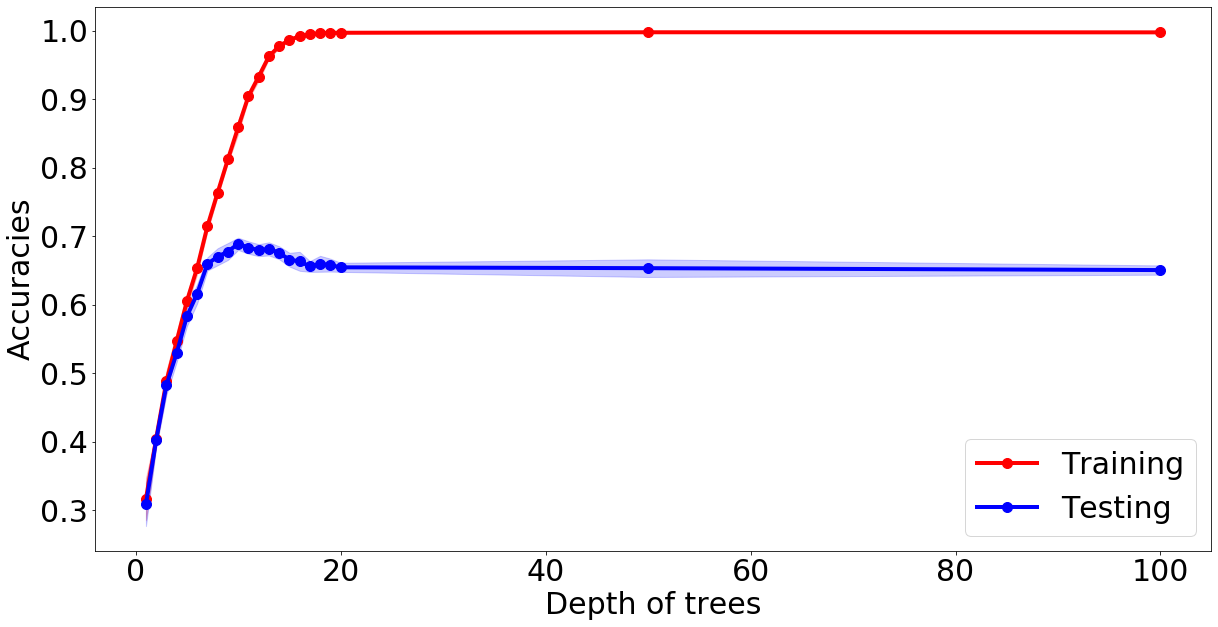

In [26]:
# Effects of the depth of the trees
# 10-fold cross validation
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(x, y)
tree_depth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,50,100]
training_accuracies = []
testing_accuracies = []

for train_index, test_index in skf.split(x, y):
    training_accuracy = []
    testing_accuracy = []
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for i in tree_depth:
        clf = RandomForestClassifier(max_depth=i)
        clf.fit(X_train, y_train.ravel())
        training_preds = clf.predict(X_train)
        preds = clf.predict(X_test)
        #print(f"============= For tree depth of {i} ===============")
        #print(f"Training accuracy =", accuracy_score(y_train,training_preds))
        #print(f"Testing accuracy =", accuracy_score(y_test,preds))
        training_accuracy.append(accuracy_score(y_train,training_preds))
        testing_accuracy.append(accuracy_score(y_test,preds))
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)
training_accuracy_nparray = np.array(training_accuracies)
testing_accuracy_nparray = np.array(testing_accuracies)
plt.clf()
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(20,10))
plt.plot(tree_depth, training_accuracy_nparray.mean(axis=0), 'ro-', label='Training',linewidth=4.0, markersize=10)
plt.plot(tree_depth, testing_accuracy_nparray.mean(axis=0), 'bo-', label='Testing',linewidth=4.0, markersize=10)
plt.fill_between(tree_depth, training_accuracy_nparray.mean(axis=0) - training_accuracy_nparray.std(axis=0), training_accuracy_nparray.mean(axis=0) + training_accuracy_nparray.std(axis=0),
                 color='red', alpha=0.2)
plt.fill_between(tree_depth, testing_accuracy_nparray.mean(axis=0) - testing_accuracy_nparray.std(axis=0), testing_accuracy_nparray.mean(axis=0) + testing_accuracy_nparray.std(axis=0),
                 color='blue', alpha=0.2)
plt.xlabel('Depth of trees')
plt.ylabel('Accuracies')
plt.legend(loc='lower right')
plt.show()

<Figure size 432x288 with 0 Axes>

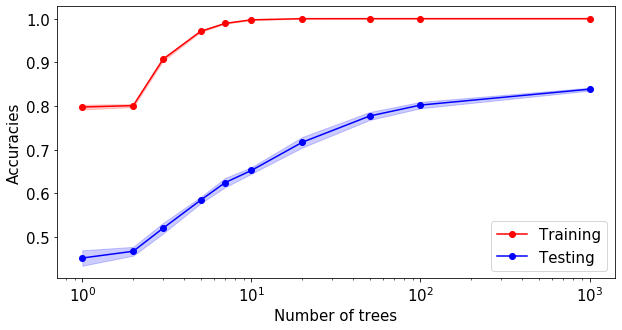

In [27]:
# Effects of the number of the trees
# Repeated random sub-sampling
num_of_trees=[1,2,3,5,7,10,20,50,100,1000]
training_accuracies = []
testing_accuracies = []

for j in range(10):
    training_accuracy = []
    testing_accuracy = []
    for i in num_of_trees:
        clf = RandomForestClassifier(n_estimators=i)
        clf.fit(X_train, y_train.ravel())
        training_preds = clf.predict(X_train)
        preds = clf.predict(X_test)
        training_accuracy.append(accuracy_score(y_train,training_preds))
        testing_accuracy.append(accuracy_score(y_test,preds))
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)
#print(training_accuracies)
training_accuracy_nparray = np.array(training_accuracies)
testing_accuracy_nparray = np.array(testing_accuracies)
plt.clf()
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.plot(num_of_trees, training_accuracy_nparray.mean(axis=0), 'ro-', label='Training')
plt.plot(num_of_trees, testing_accuracy_nparray.mean(axis=0), 'bo-', label='Testing')
plt.fill_between(num_of_trees, training_accuracy_nparray.mean(axis=0) - training_accuracy_nparray.std(axis=0), training_accuracy_nparray.mean(axis=0) + training_accuracy_nparray.std(axis=0),
                 color='red', alpha=0.2)
plt.fill_between(num_of_trees, testing_accuracy_nparray.mean(axis=0) - testing_accuracy_nparray.std(axis=0), testing_accuracy_nparray.mean(axis=0) + testing_accuracy_nparray.std(axis=0),
                 color='blue', alpha=0.2)
plt.xlabel('Number of trees')
plt.ylabel('Accuracies')
plt.legend(loc='lower right')
plt.xscale('log')
plt.show()


<Figure size 432x288 with 0 Axes>

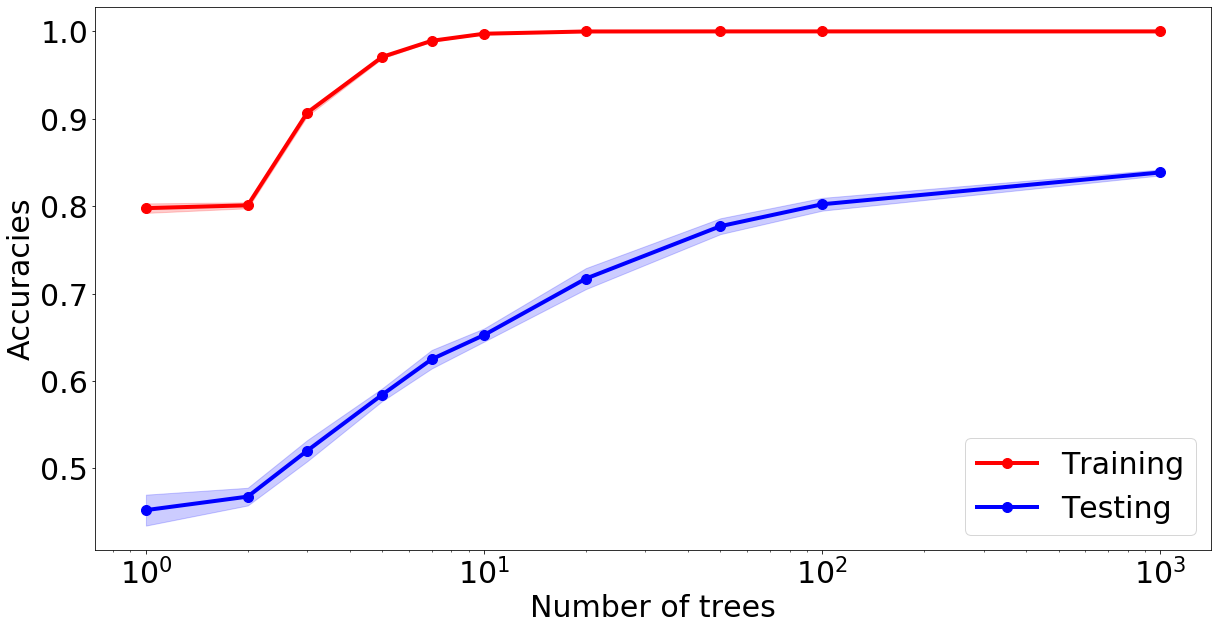

In [30]:
plt.clf()
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(20,10))
plt.plot(num_of_trees, training_accuracy_nparray.mean(axis=0), 'ro-', label='Training',linewidth=4.0, markersize=10)
plt.plot(num_of_trees, testing_accuracy_nparray.mean(axis=0), 'bo-', label='Testing',linewidth=4.0, markersize=10)
plt.fill_between(num_of_trees, training_accuracy_nparray.mean(axis=0) - training_accuracy_nparray.std(axis=0), training_accuracy_nparray.mean(axis=0) + training_accuracy_nparray.std(axis=0),
                 color='red', alpha=0.2)
plt.fill_between(num_of_trees, testing_accuracy_nparray.mean(axis=0) - testing_accuracy_nparray.std(axis=0), testing_accuracy_nparray.mean(axis=0) + testing_accuracy_nparray.std(axis=0),
                 color='blue', alpha=0.2)
plt.xlabel('Number of trees')
plt.ylabel('Accuracies')
plt.legend(loc='lower right')
plt.xscale('log')
plt.show()

<Figure size 432x288 with 0 Axes>

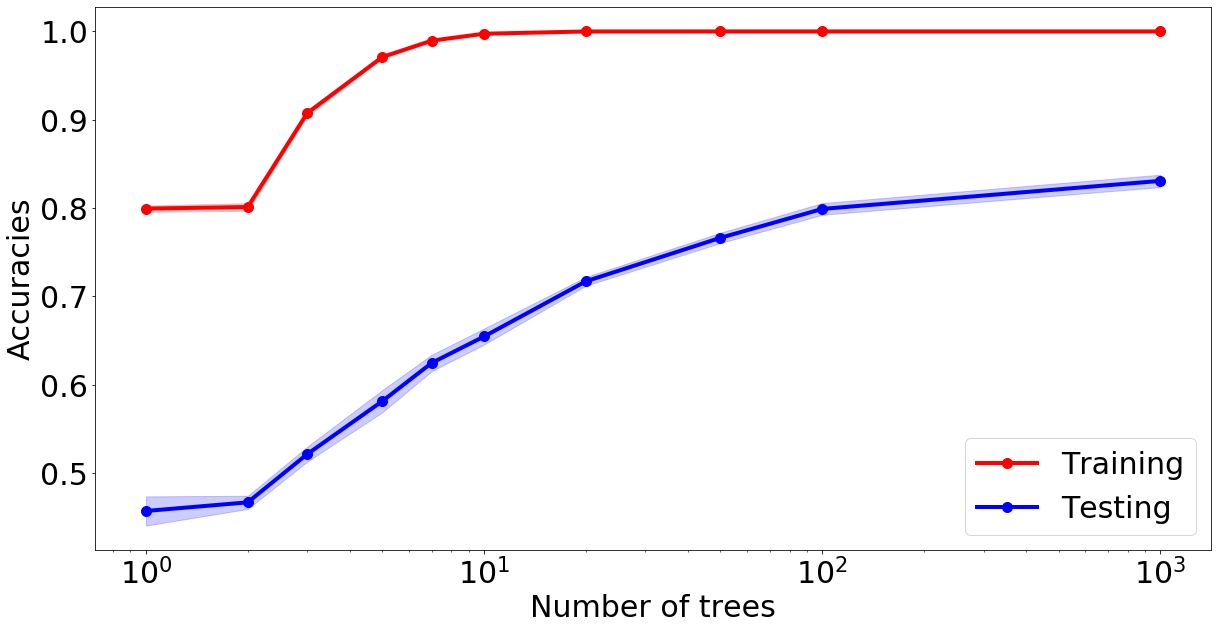

In [31]:
# Effects of the depth of the trees
# 10-fold cross validation
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(x, y)
num_of_trees=[1,2,3,5,7,10,20,50,100,1000]
training_accuracies = []
testing_accuracies = []

for train_index, test_index in skf.split(x, y):
    training_accuracy = []
    testing_accuracy = []
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for i in num_of_trees:
        clf = RandomForestClassifier(n_estimators=i)
        clf.fit(X_train, y_train.ravel())
        training_preds = clf.predict(X_train)
        preds = clf.predict(X_test)
        #print(f"============= For tree depth of {i} ===============")
        #print(f"Training accuracy =", accuracy_score(y_train,training_preds))
        #print(f"Testing accuracy =", accuracy_score(y_test,preds))
        training_accuracy.append(accuracy_score(y_train,training_preds))
        testing_accuracy.append(accuracy_score(y_test,preds))
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)
training_accuracy_nparray = np.array(training_accuracies)
testing_accuracy_nparray = np.array(testing_accuracies)

plt.clf()
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(20,10))
plt.plot(num_of_trees, training_accuracy_nparray.mean(axis=0), 'ro-', label='Training',linewidth=4.0, markersize=10)
plt.plot(num_of_trees, testing_accuracy_nparray.mean(axis=0), 'bo-', label='Testing',linewidth=4.0, markersize=10)
plt.fill_between(num_of_trees, training_accuracy_nparray.mean(axis=0) - training_accuracy_nparray.std(axis=0), training_accuracy_nparray.mean(axis=0) + training_accuracy_nparray.std(axis=0),
                 color='red', alpha=0.2)
plt.fill_between(num_of_trees, testing_accuracy_nparray.mean(axis=0) - testing_accuracy_nparray.std(axis=0), testing_accuracy_nparray.mean(axis=0) + testing_accuracy_nparray.std(axis=0),
                 color='blue', alpha=0.2)
plt.xlabel('Number of trees')
plt.ylabel('Accuracies')
plt.legend(loc='lower right')
plt.xscale('log')
plt.show()

<Figure size 432x288 with 0 Axes>

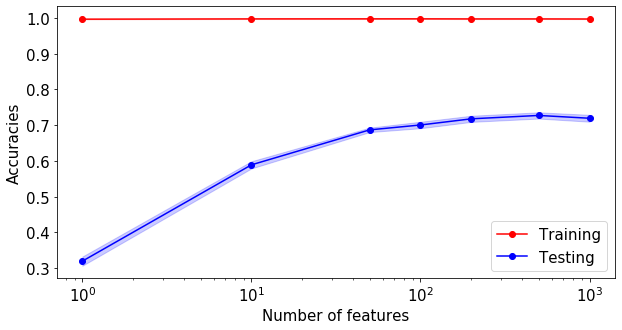

In [32]:
# Effects of the number of features
# Repeated random sub-sampling
num_of_features=[1,10,50,100,200,500,1000]
training_accuracies = []
testing_accuracies = []
#print(X_train.shape)
for j in range(10):
    training_accuracy = []
    testing_accuracy = []
    for i in num_of_features:
        clf = RandomForestClassifier(max_features=i)
        clf.fit(X_train, y_train.ravel())
        training_preds = clf.predict(X_train)
        preds = clf.predict(X_test)
        training_accuracy.append(accuracy_score(y_train,training_preds))
        testing_accuracy.append(accuracy_score(y_test,preds))
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)
#print(training_accuracies)
training_accuracy_nparray = np.array(training_accuracies)
testing_accuracy_nparray = np.array(testing_accuracies)
plt.clf()
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.plot(num_of_features, training_accuracy_nparray.mean(axis=0), 'ro-', label='Training')
plt.plot(num_of_features, testing_accuracy_nparray.mean(axis=0), 'bo-', label='Testing')
plt.fill_between(num_of_features, training_accuracy_nparray.mean(axis=0) - training_accuracy_nparray.std(axis=0), training_accuracy_nparray.mean(axis=0) + training_accuracy_nparray.std(axis=0),
                 color='red', alpha=0.2)
plt.fill_between(num_of_features, testing_accuracy_nparray.mean(axis=0) - testing_accuracy_nparray.std(axis=0), testing_accuracy_nparray.mean(axis=0) + testing_accuracy_nparray.std(axis=0),
                 color='blue', alpha=0.2)
plt.xlabel('Number of features')
plt.ylabel('Accuracies')
plt.legend(loc='lower right')
plt.xscale('log')
plt.show()

<Figure size 432x288 with 0 Axes>

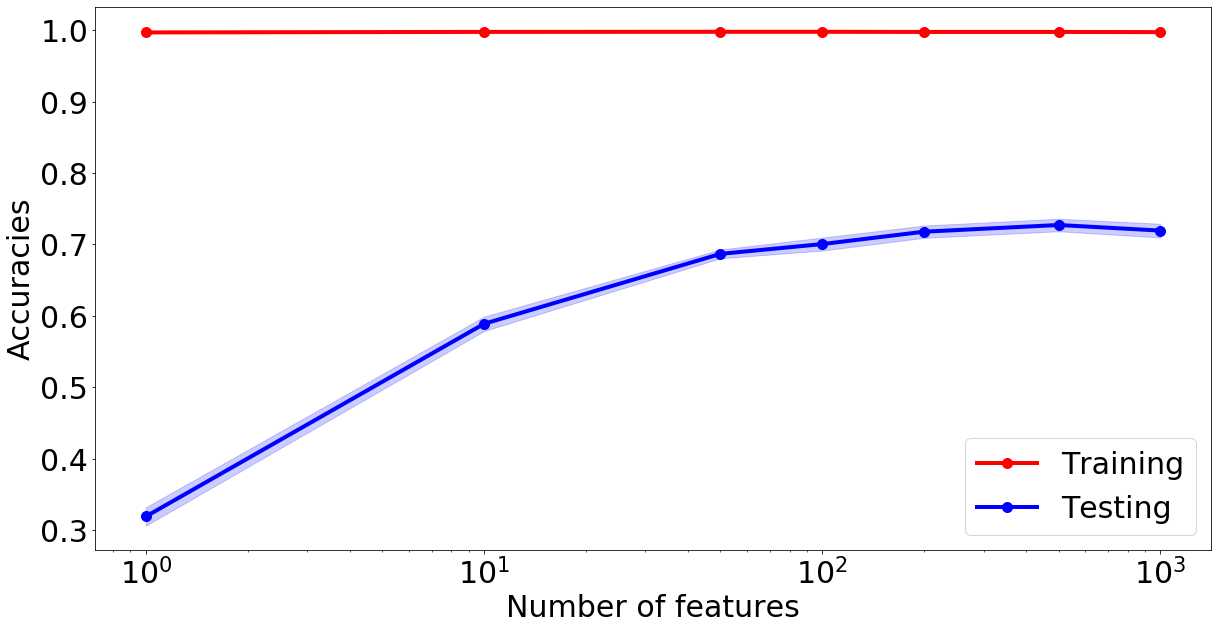

In [33]:
plt.clf()
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(20,10))
plt.plot(num_of_features, training_accuracy_nparray.mean(axis=0), 'ro-', label='Training',linewidth=4.0, markersize=10)
plt.plot(num_of_features, testing_accuracy_nparray.mean(axis=0), 'bo-', label='Testing',linewidth=4.0, markersize=10)
plt.fill_between(num_of_features, training_accuracy_nparray.mean(axis=0) - training_accuracy_nparray.std(axis=0), training_accuracy_nparray.mean(axis=0) + training_accuracy_nparray.std(axis=0),
                 color='red', alpha=0.2)
plt.fill_between(num_of_features, testing_accuracy_nparray.mean(axis=0) - testing_accuracy_nparray.std(axis=0), testing_accuracy_nparray.mean(axis=0) + testing_accuracy_nparray.std(axis=0),
                 color='blue', alpha=0.2)
plt.xlabel('Number of features')
plt.ylabel('Accuracies')
plt.legend(loc='lower right')
plt.xscale('log')
plt.show()

<Figure size 432x288 with 0 Axes>

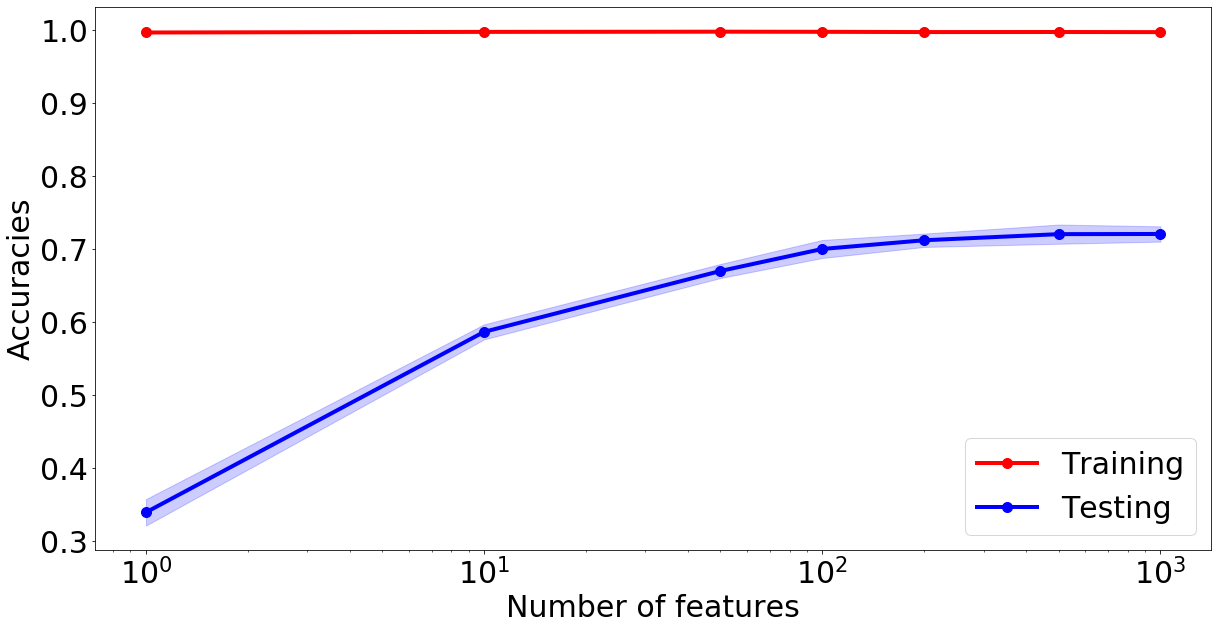

In [34]:
# Effects of the number of features
# 10-fold cross validation
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(x, y)
num_of_features=[1,10,50,100,200,500,1000]
training_accuracies = []
testing_accuracies = []

for train_index, test_index in skf.split(x, y):
    training_accuracy = []
    testing_accuracy = []
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for i in num_of_features:
        clf = RandomForestClassifier(max_features=i)
        clf.fit(X_train, y_train.ravel())
        training_preds = clf.predict(X_train)
        preds = clf.predict(X_test)
        #print(f"============= For tree depth of {i} ===============")
        #print(f"Training accuracy =", accuracy_score(y_train,training_preds))
        #print(f"Testing accuracy =", accuracy_score(y_test,preds))
        training_accuracy.append(accuracy_score(y_train,training_preds))
        testing_accuracy.append(accuracy_score(y_test,preds))
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)
training_accuracy_nparray = np.array(training_accuracies)
testing_accuracy_nparray = np.array(testing_accuracies)

plt.clf()
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(20,10))
plt.plot(num_of_features, training_accuracy_nparray.mean(axis=0), 'ro-', label='Training',linewidth=4.0, markersize=10)
plt.plot(num_of_features, testing_accuracy_nparray.mean(axis=0), 'bo-', label='Testing',linewidth=4.0, markersize=10)
plt.fill_between(num_of_features, training_accuracy_nparray.mean(axis=0) - training_accuracy_nparray.std(axis=0), training_accuracy_nparray.mean(axis=0) + training_accuracy_nparray.std(axis=0),
                 color='red', alpha=0.2)
plt.fill_between(num_of_features, testing_accuracy_nparray.mean(axis=0) - testing_accuracy_nparray.std(axis=0), testing_accuracy_nparray.mean(axis=0) + testing_accuracy_nparray.std(axis=0),
                 color='blue', alpha=0.2)
plt.xlabel('Number of features')
plt.ylabel('Accuracies')
plt.legend(loc='lower right')
plt.xscale('log')
plt.show()

In [35]:
#Optimized random forest
accuracies = []
for j in range(1):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y)
    #ShowDataImage((X_test,y_test))
    #print(y_test)
    #print(np.count_nonzero(y_test == 0))
    #print(np.count_nonzero(y_test == 1))
    # Build A Random Forest Classifier
    #print(j)
    RF_optimized = RandomForestClassifier(max_depth=11, n_estimators=1000, max_features=500)
    RF_optimized.fit(X_train, y_train.ravel())

    #Predict
    preds = RF_optimized.predict(X_test)
    accuracy = accuracy_score(y_test,preds)
    accuracies.append(accuracy)
    average_accuracy = np.around(np.array(accuracies).mean(axis=0),4)
#Check The Accuracy Of The Model
print("Accuracy of Random Forest with Optimized Settings:", average_accuracy)


Accuracy of Random Forest with Optimized Settings: 0.8323


Confusion matrix of Random Forest with Optimized Settings


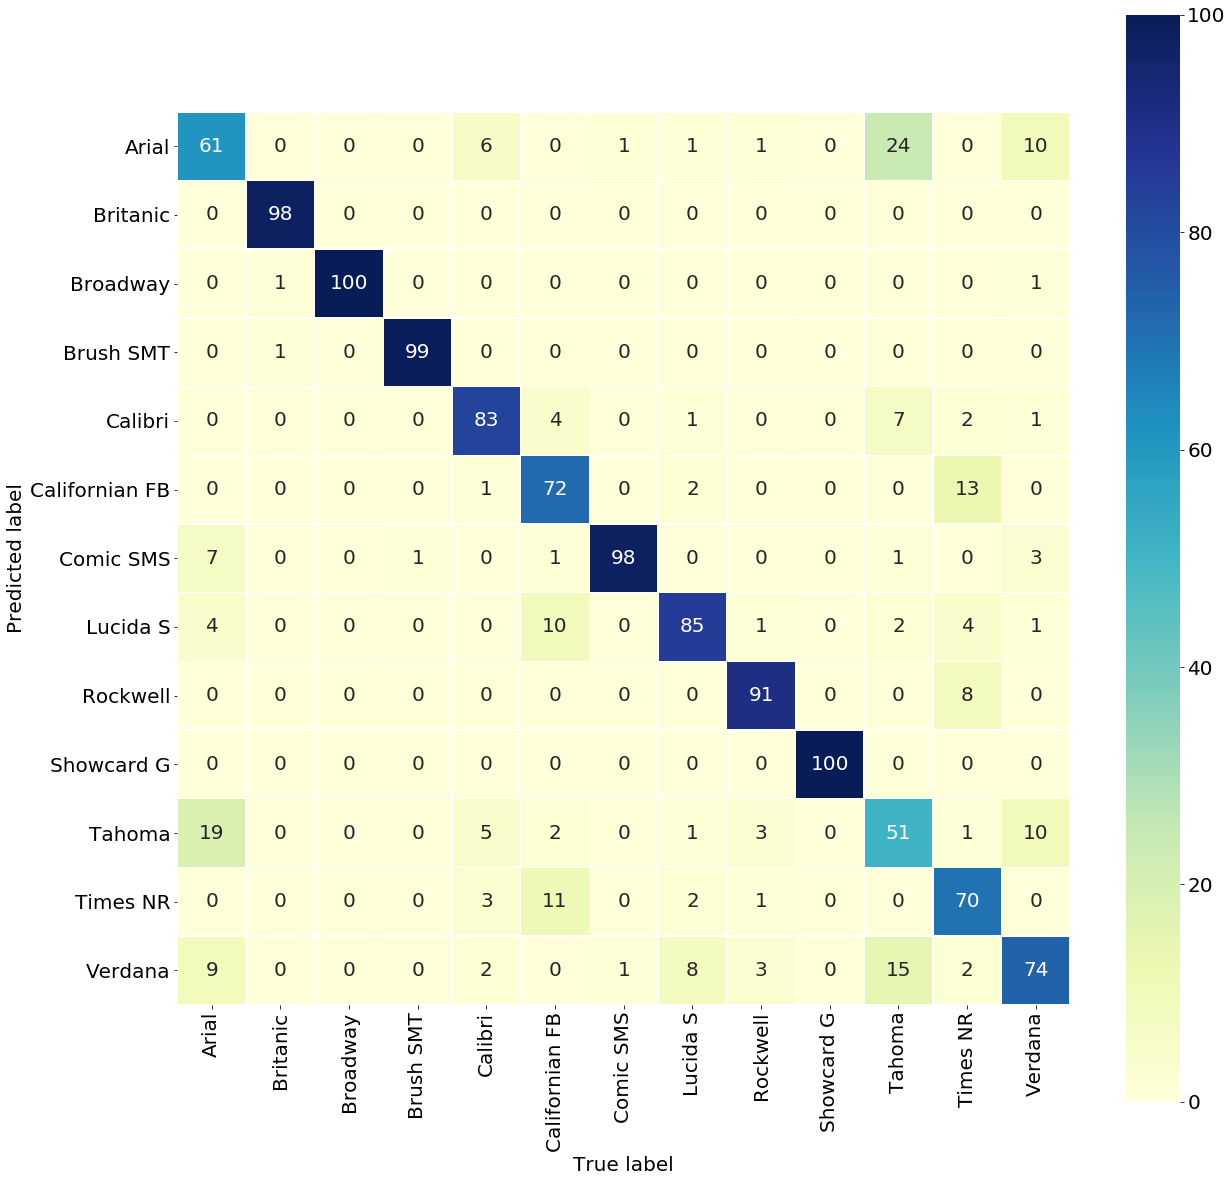

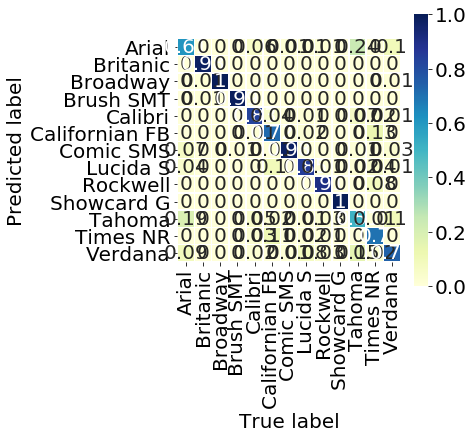

In [39]:
#Create confusion matrix
#print(y_test.ravel())
#print(preds)
#print(Fonts[y_test.ravel()])
y_test_fontlabels = []
preds_fontlabels = []
for i in y_test.ravel():
    y_test_fontlabels.append(Fonts[int(i)])
for i in preds:
    preds_fontlabels.append(Fonts[int(i)])
#print(y_test_fontlabels)
#print(preds_fontlabels)
#pd.crosstab(a, b, rownames=['a'], colnames=['b'])
mat = confusion_matrix(y_test_fontlabels, preds_fontlabels, labels=Fonts)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,20))
sns.heatmap(mat.T, square=True, annot=True, xticklabels=Fonts_abbr, yticklabels=Fonts_abbr, linewidths=.5, cmap="YlGnBu", fmt='g')
plt.xlabel('True label')
plt.ylabel('Predicted label')
mat = mat / mat.astype(np.float).sum(axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, xticklabels=Fonts_abbr, yticklabels=Fonts_abbr, linewidths=.5, cmap="YlGnBu")
plt.xlabel('True label')
plt.ylabel('Predicted label')
#print(mat.T)
print('Confusion matrix of Random Forest with Optimized Settings')

# Data Pre-processing with PCA

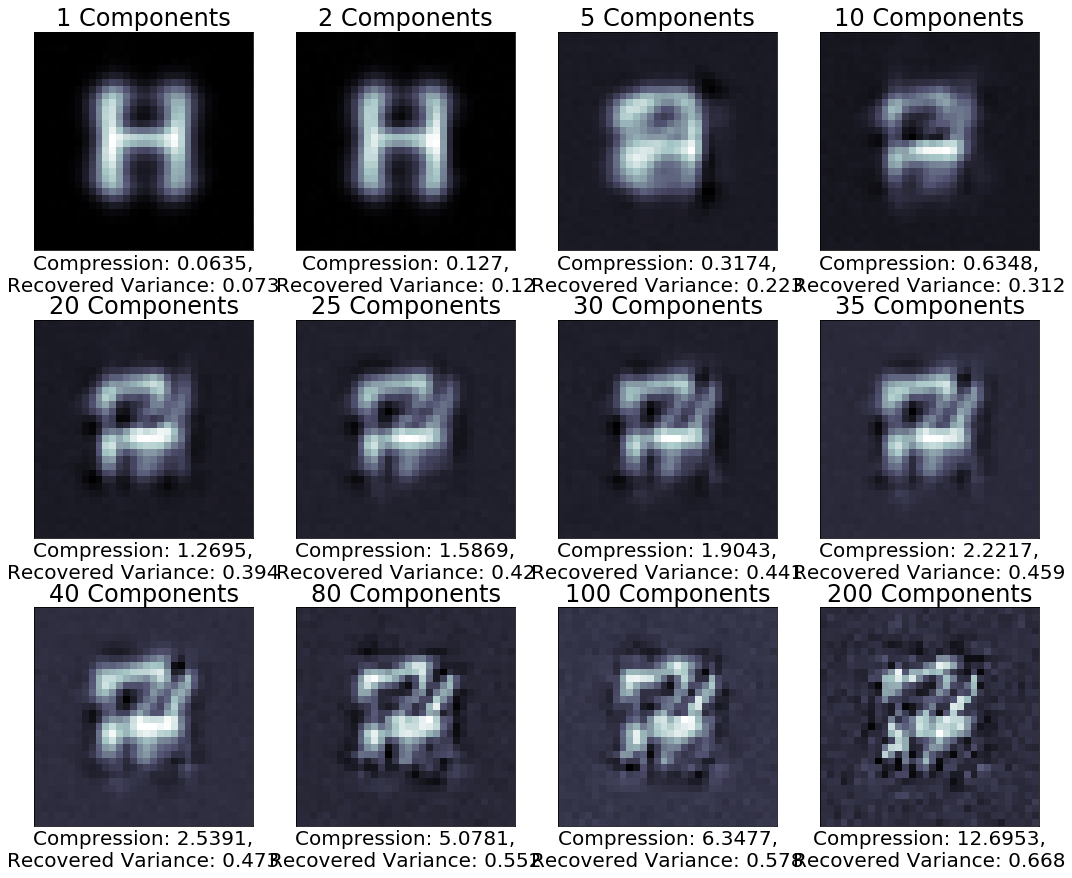

<Figure size 432x288 with 0 Axes>

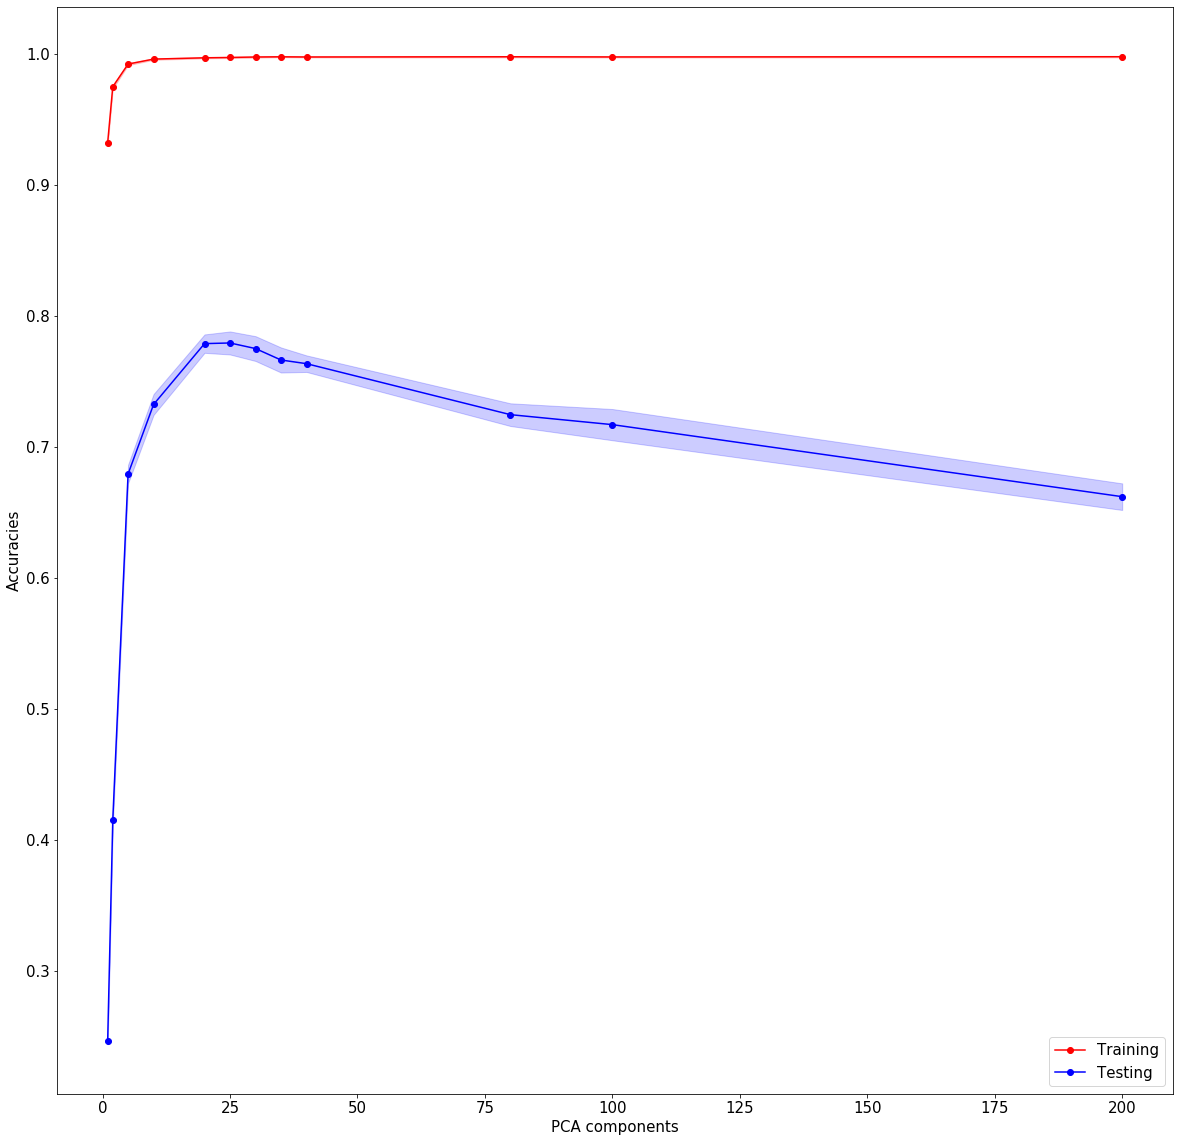

Accuracy of PCA with 1 components + Default Random Forest: 0.2464
Accuracy of PCA with 2 components + Default Random Forest: 0.4149
Accuracy of PCA with 5 components + Default Random Forest: 0.679
Accuracy of PCA with 10 components + Default Random Forest: 0.7321
Accuracy of PCA with 20 components + Default Random Forest: 0.7786
Accuracy of PCA with 25 components + Default Random Forest: 0.7791
Accuracy of PCA with 30 components + Default Random Forest: 0.7748
Accuracy of PCA with 35 components + Default Random Forest: 0.7661
Accuracy of PCA with 40 components + Default Random Forest: 0.7633
Accuracy of PCA with 80 components + Default Random Forest: 0.7243
Accuracy of PCA with 100 components + Default Random Forest: 0.7167
Accuracy of PCA with 200 components + Default Random Forest: 0.6617


In [40]:
#PCA+Default RF
'''
pca = PCA()  
X_train2 = pca.fit_transform(X_train)  
X_test2 = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_  

pca = PCA(n_components=36)  
X_train3 = pca.fit_transform(X_train)  
X_test3 = pca.transform(X_test)  
clf_PCA = RandomForestClassifier()
clf_PCA.fit(X_train3, y_train.ravel())
preds_PCA = clf_PCA.predict(X_test3)

#Check The Accuracy Of The Model
print("Accuracy after PCA:", accuracy_score(y_test,preds_PCA))
'''

number_components = [1,2,5,10,20,25,30,35,40,80,100,200]

training_accuracies = []
testing_accuracies = []
counter = 0
fig = plt.figure(figsize=(18, 15))
for j in range(20):
    training_accuracy = []
    testing_accuracy = []
    for i in number_components:
        pca = PCA(n_components=i)  
        X_train3 = pca.fit_transform(X_train)  
        X_test3 = pca.transform(X_test)  
        RF_PCA = RandomForestClassifier()
        RF_PCA.fit(X_train3, y_train.ravel())
        preds_PCA = RF_PCA.predict(X_test3)
        training_preds_PCA = RF_PCA.predict(X_train3)
        #print(f"Accuracy after PCA with {i} components: {accuracy_score(y_test,preds_PCA)}")
        
        #Visualize PCA
        if j == 0:
            X_train3_proj = pca.inverse_transform(X_train3[0])
            X_train3_proj = np.reshape(X_train3_proj, (32, 32))
            #c = np.around(compression_ratio(image, k), 4)
            #r = np.around(recovered_variance_proportion(S, k), 3)
            ax = fig.add_subplot(3, 4, counter + 1, xticks=[], yticks=[])
            ax.imshow(X_train3_proj, cmap=plt.cm.bone)
            ax.set_title(f"{i} Components")
            compression_ratio =  np.around((i*(32+32+1))/(32*32),4)
            recovered_variance = np.around(sum(pca.explained_variance_ratio_),3)
            ax.set_xlabel(f"Compression: {compression_ratio},\nRecovered Variance: {recovered_variance}")
            counter = counter+1
        
        training_accuracy.append(accuracy_score(y_train,training_preds_PCA))
        testing_accuracy.append(accuracy_score(y_test,preds_PCA))
    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)
    
plt.show()
#print(training_accuracies)
training_accuracy_nparray = np.array(training_accuracies)
testing_accuracy_nparray = np.array(testing_accuracies)
plt.clf()
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,20))
plt.plot(number_components, training_accuracy_nparray.mean(axis=0), 'ro-', label='Training')
plt.plot(number_components, testing_accuracy_nparray.mean(axis=0), 'bo-', label='Testing')
plt.fill_between(number_components, training_accuracy_nparray.mean(axis=0) - training_accuracy_nparray.std(axis=0), training_accuracy_nparray.mean(axis=0) + training_accuracy_nparray.std(axis=0),
                 color='red', alpha=0.2)
plt.fill_between(number_components, testing_accuracy_nparray.mean(axis=0) - testing_accuracy_nparray.std(axis=0), testing_accuracy_nparray.mean(axis=0) + testing_accuracy_nparray.std(axis=0),
                 color='blue', alpha=0.2)
plt.xlabel('PCA components')
plt.ylabel('Accuracies')
plt.legend(loc='lower right')
plt.show()

for i in range(len(number_components)):
    print(f"Accuracy of PCA with {number_components[i]} components + Default Random Forest: {np.around(testing_accuracy_nparray.mean(axis=0)[i],4)}")

<Figure size 432x288 with 0 Axes>

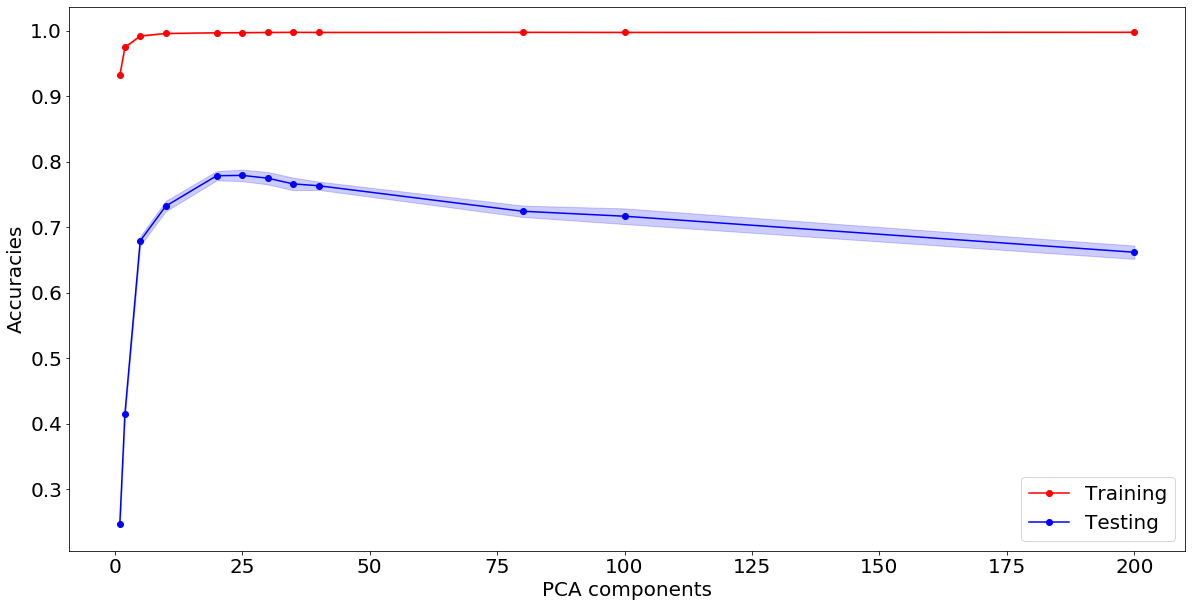

In [45]:
plt.show()
#print(training_accuracies)
training_accuracy_nparray = np.array(training_accuracies)
testing_accuracy_nparray = np.array(testing_accuracies)
plt.clf()
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,10))
plt.plot(number_components, training_accuracy_nparray.mean(axis=0), 'ro-', label='Training')
plt.plot(number_components, testing_accuracy_nparray.mean(axis=0), 'bo-', label='Testing')
plt.fill_between(number_components, training_accuracy_nparray.mean(axis=0) - training_accuracy_nparray.std(axis=0), training_accuracy_nparray.mean(axis=0) + training_accuracy_nparray.std(axis=0),
                 color='red', alpha=0.2)
plt.fill_between(number_components, testing_accuracy_nparray.mean(axis=0) - testing_accuracy_nparray.std(axis=0), testing_accuracy_nparray.mean(axis=0) + testing_accuracy_nparray.std(axis=0),
                 color='blue', alpha=0.2)
plt.xlabel('PCA components')
plt.ylabel('Accuracies')
plt.legend(loc='lower right')
plt.show()

Confusion matrix of Default Random Forest after PCA with 25 Components


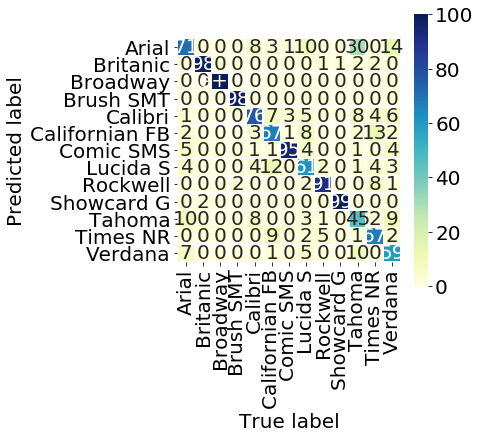

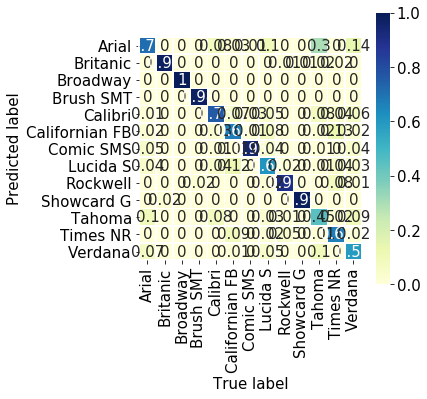

In [46]:
#PCA + Default RF
pca = PCA(n_components=25)  
X_train3 = pca.fit_transform(X_train)  
X_test3 = pca.transform(X_test)  
RF_default_PCA_25 = RandomForestClassifier()
RF_default_PCA_25.fit(X_train3, y_train.ravel())
preds_PCA = RF_default_PCA_25.predict(X_test3)
y_test_fontlabels = []
preds_fontlabels = []
for i in y_test.ravel():
    y_test_fontlabels.append(Fonts[int(i)])
for i in preds_PCA:
    preds_fontlabels.append(Fonts[int(i)])
mat = confusion_matrix(y_test_fontlabels, preds_fontlabels, labels=Fonts)
plt.figure(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, xticklabels=Fonts_abbr, yticklabels=Fonts_abbr, linewidths=.5, cmap="YlGnBu")
plt.xlabel('True label')
plt.ylabel('Predicted label')
mat = mat / mat.astype(np.float).sum(axis=1)
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, xticklabels=Fonts_abbr, yticklabels=Fonts_abbr, linewidths=.5, cmap="YlGnBu")
plt.xlabel('True label')
plt.ylabel('Predicted label')
print('Confusion matrix of Default Random Forest after PCA with 25 Components')

Accuracy of PCA with 25 components + Optimized Random Forest: 0.8323
Confusion matrix of Optimized Random Forest after PCA with 25 Components


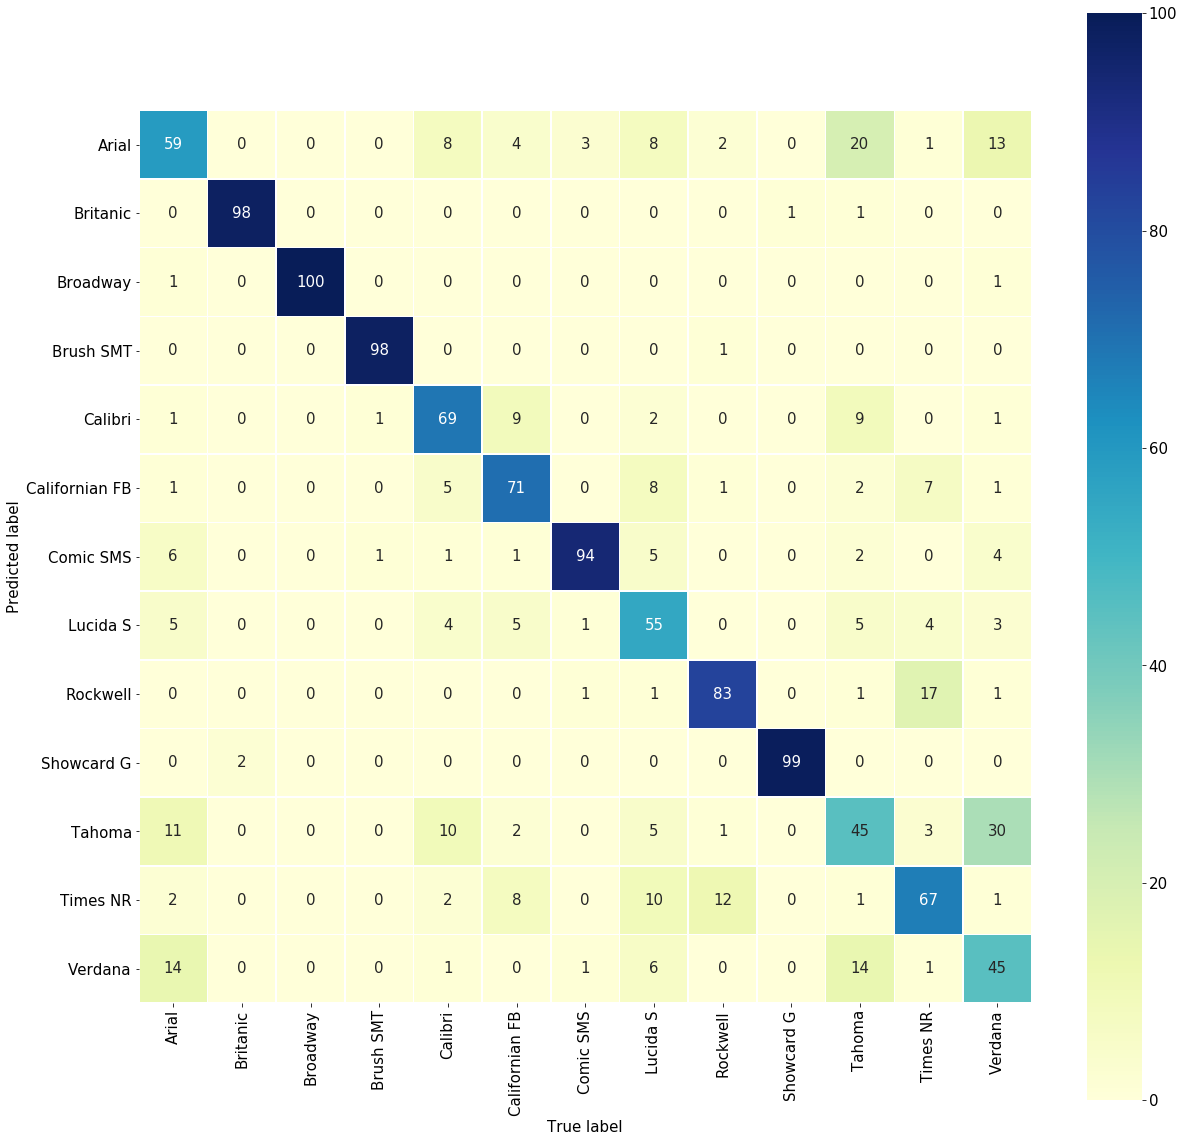

In [50]:
#PCA + Optimized RF

mat = []
accuracies = []
for j in range(1):
    pca = PCA(n_components=25)  
    X_train3 = pca.fit_transform(X_train)  
    X_test3 = pca.transform(X_test)  
    RF_optimized_PCA_25 = RandomForestClassifier(max_depth=11, n_estimators=1000, max_features=25)
    RF_optimized_PCA_25.fit(X_train3, y_train.ravel())
    preds_PCA = RF_optimized_PCA_25.predict(X_test3)
    y_test_fontlabels = []
    preds_fontlabels = []
    for i in y_test.ravel():
        y_test_fontlabels.append(Fonts[int(i)])
    for i in preds_PCA:
        preds_fontlabels.append(Fonts[int(i)])

    mat.append(confusion_matrix(y_test_fontlabels, preds_fontlabels, labels=Fonts))
    accuracies.append(accuracy_score(y_test,preds))
#mat = confusion_matrix(y_test_fontlabels, preds_fontlabels, labels=Fonts)
mat = np.array(mat)
mat = mat.mean(axis=0)
#print(mat.shape)        
plt.figure(figsize=(20,20))
sns.heatmap(mat.T, square=True, annot=True, xticklabels=Fonts_abbr, yticklabels=Fonts_abbr, linewidths=.5, cmap="YlGnBu", fmt='g')
plt.xlabel('True label')
plt.ylabel('Predicted label')
#print(mat)
#print(mat.astype(np.float).sum(axis=1))
#mat = mat / mat.astype(np.float).sum(axis=1)
#plt.rcParams.update({'font.size': 15})
#plt.figure(figsize=(5,5))
#sns.heatmap(mat.T, square=True, annot=True, xticklabels=Fonts_abbr, yticklabels=Fonts_abbr, linewidths=.5, cmap="YlGnBu")
#plt.xlabel('True label')
#plt.ylabel('Predicted label')
accuracies = np.array(accuracies)
average_accuracy = accuracies.mean(axis=0)
print(f"Accuracy of PCA with 25 components + Optimized Random Forest: {np.around(average_accuracy,4)}")
print('Confusion matrix of Optimized Random Forest after PCA with 25 Components')

Text(154.0, 0.5, 'Predicted label')

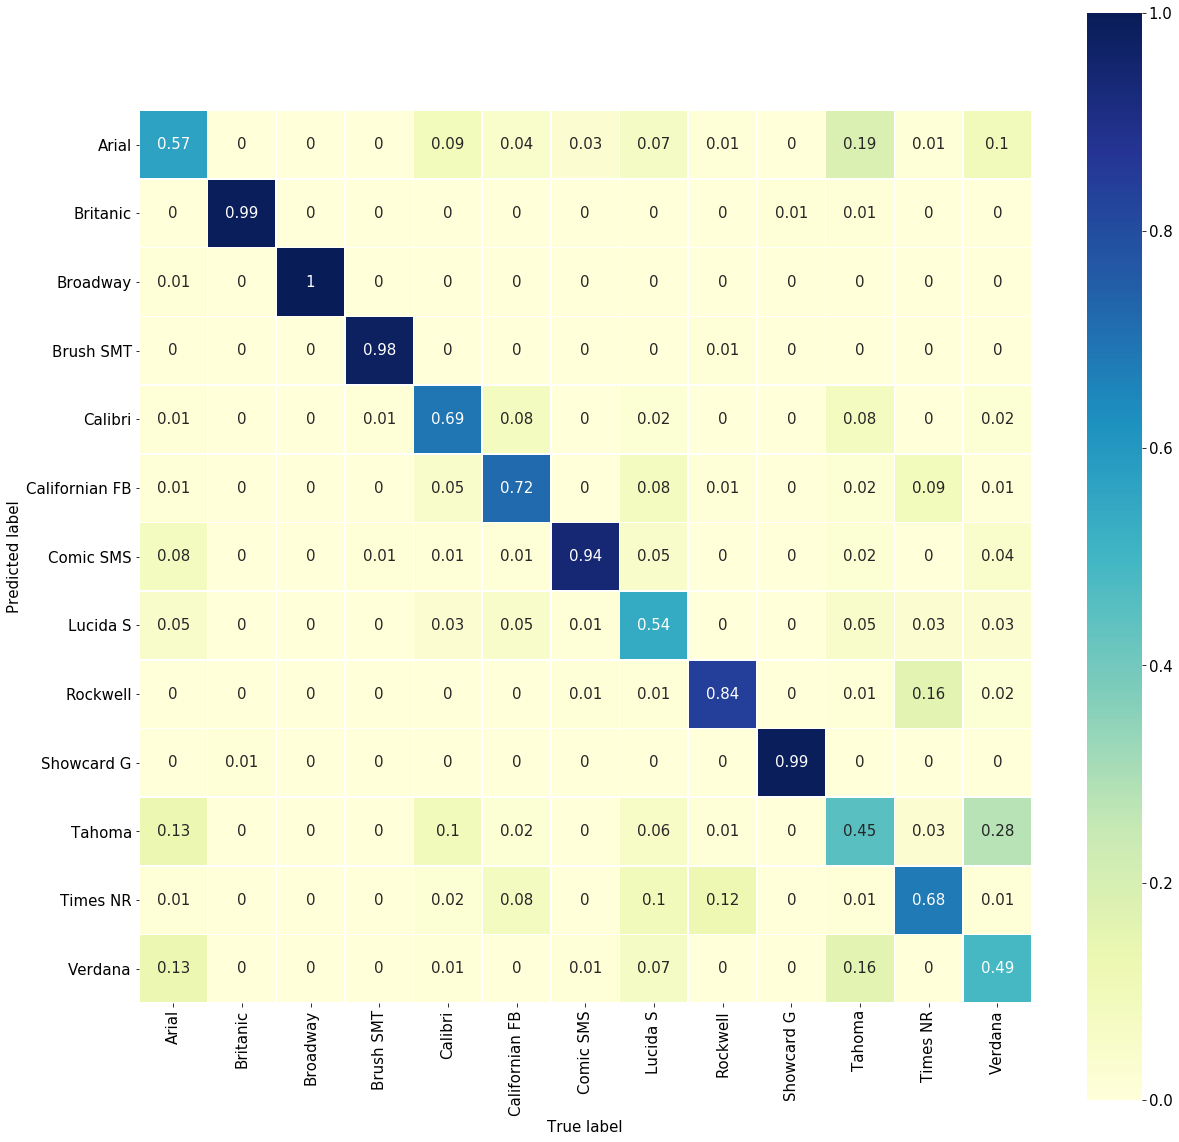

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(mat.T, square=True, annot=True, xticklabels=Fonts_abbr, yticklabels=Fonts_abbr, linewidths=.5, cmap="YlGnBu", fmt='g')
plt.xlabel('True label')
plt.ylabel('Predicted label')

# Logistic Regression

In [51]:
#Logistic regression
LR = LogisticRegression(solver='liblinear', multi_class='auto')
LR.fit(X_train, y_train.ravel())
preds_LR = LR.predict(X_test)
training_preds_LR = LR.predict(X_train)
print(accuracy_score(y_train,training_preds_LR))
print(accuracy_score(y_test,preds_LR))

0.9232478632478632
0.6307692307692307


/Users/chris/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# ROC Curves

<Figure size 432x288 with 0 Axes>

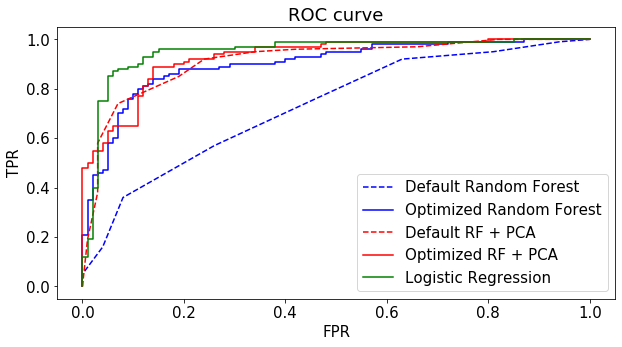

In [120]:
#This is for binary classes
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y)
plt.clf()
plt.figure(figsize=(15,15))

#Default RF
RF_default = RandomForestClassifier()
RF_default.fit(X_train, y_train.ravel())
predictions = RF_default.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.plot(fpr, tpr, 'b--', label='Default Random Forest')

#Optimized RF
RF_optimized = RandomForestClassifier(max_depth=7, n_estimators=100, max_features=100)
RF_optimized.fit(X_train, y_train.ravel())
predictions = RF_optimized.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.plot(fpr, tpr, 'b-', label='Optimized Random Forest')

#Default RF + PCA
pca = PCA(n_components=25)  
X_train3 = pca.fit_transform(X_train)  
X_test3 = pca.transform(X_test)  
RF_default_PCA_25 = RandomForestClassifier()
RF_default_PCA_25.fit(X_train3, y_train.ravel())
predictions = RF_default_PCA_25.predict_proba(X_test3)
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.plot(fpr, tpr, 'r--', label='Default RF + PCA')

#Optimized RF + PCA
pca = PCA(n_components=25)  
X_train3 = pca.fit_transform(X_train)  
X_test3 = pca.transform(X_test)  
RF_optimized_PCA_25 = RandomForestClassifier(max_depth=7, n_estimators=100, max_features=25)
RF_optimized_PCA_25.fit(X_train3, y_train.ravel())
predictions = RF_optimized_PCA_25.predict_proba(X_test3)
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.plot(fpr, tpr, 'r-', label='Optimized RF + PCA')

#Logistic Regression
LR = LogisticRegression(solver='liblinear', multi_class='auto')
LR.fit(X_train, y_train.ravel())
predictions = LR.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
plt.plot(fpr, tpr, 'g-', label='Logistic Regression')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()




/Users/chris/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<Figure size 432x288 with 0 Axes>

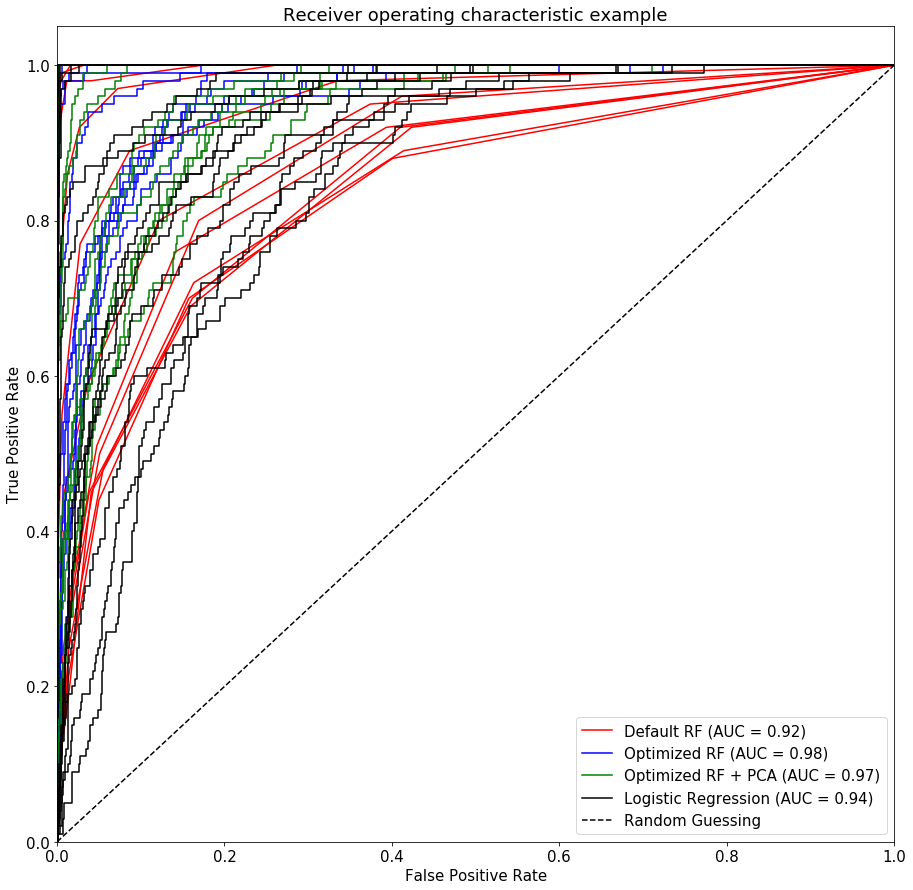

In [89]:
#One-vs-All approach
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_binarize = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12])
n_classes = 13
plt.clf()
plt.figure(figsize=(15,15))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y)

RF_default = RandomForestClassifier()
RF_default.fit(X_train, y_train.ravel())
predictions_default = RF_default.predict_proba(X_test)

average_auc = 0
for i in range(n_classes):
    y_test_binary = np.where(y_test == i, 1, 0)
    fpr, tpr, _ = roc_curve(y_test_binary, predictions_default[:,i])
    roc_auc = auc(fpr, tpr)
    average_auc = average_auc + roc_auc/n_classes
    if i==n_classes-1:
        plt.plot(fpr, tpr,'r-', label='Default RF (AUC = %0.2f)' % average_auc)
    else:
        plt.plot(fpr, tpr,'r-')
        
RF_optimized = RandomForestClassifier(max_depth=11, n_estimators=1000, max_features=500)
RF_optimized.fit(X_train, y_train.ravel())
predictions_optimized = RF_optimized.predict_proba(X_test)

average_auc = 0
for i in range(n_classes):
    y_test_binary = np.where(y_test == i, 1, 0)
    fpr, tpr, _ = roc_curve(y_test_binary, predictions_optimized[:,i])
    roc_auc = auc(fpr, tpr)
    average_auc = average_auc + roc_auc/n_classes
    if i==n_classes-1:
        plt.plot(fpr, tpr,'b-', label='Optimized RF (AUC = %0.2f)' % average_auc)
    else:
        plt.plot(fpr, tpr,'b-')

pca = PCA(n_components=25)  
X_train3 = pca.fit_transform(X_train)  
X_test3 = pca.transform(X_test)  
RF_optimized_PCA_25 = RandomForestClassifier(max_depth=11, n_estimators=1000, max_features=25)
RF_optimized_PCA_25.fit(X_train3, y_train.ravel())
predictions_optimized_PCA_25 = RF_optimized_PCA_25.predict_proba(X_test3)
        
average_auc = 0
for i in range(n_classes):
    y_test_binary = np.where(y_test == i, 1, 0)
    fpr, tpr, _ = roc_curve(y_test_binary, predictions_optimized_PCA_25[:,i])
    roc_auc = auc(fpr, tpr)
    average_auc = average_auc + roc_auc/n_classes
    if i==n_classes-1:
        plt.plot(fpr, tpr,'g-', label='Optimized RF + PCA (AUC = %0.2f)' % average_auc)
    else:
        plt.plot(fpr, tpr,'g-')
        
LR = LogisticRegression(solver='liblinear', multi_class='auto')
LR.fit(X_train, y_train.ravel())
predictions_LR = LR.predict_proba(X_test)
        
average_auc = 0
for i in range(n_classes):
    y_test_binary = np.where(y_test == i, 1, 0)
    fpr, tpr, _ = roc_curve(y_test_binary, predictions_LR[:,i])
    roc_auc = auc(fpr, tpr)
    average_auc = average_auc + roc_auc/n_classes
    if i==n_classes-1:
        plt.plot(fpr, tpr,'k-', label='Logistic Regression (AUC = %0.2f)' % average_auc)
    else:
        plt.plot(fpr, tpr,'k-')
        
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

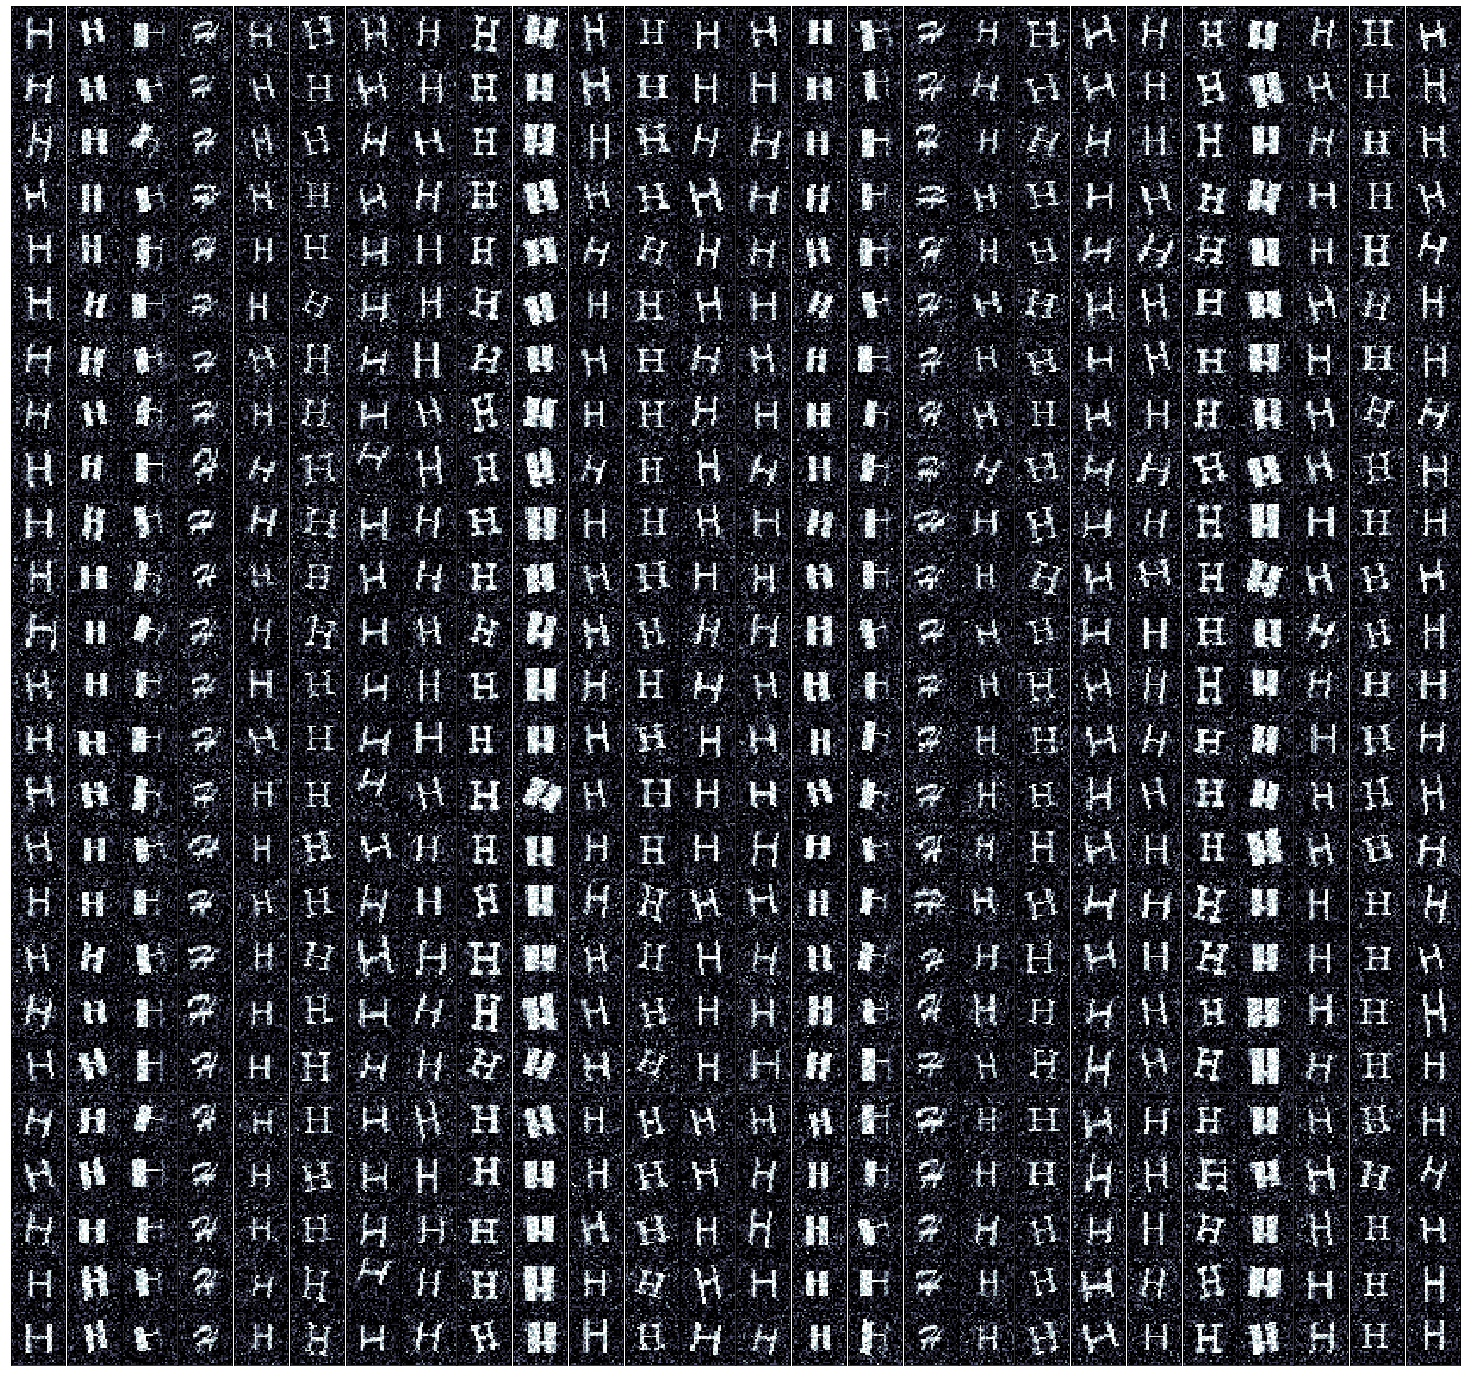

In [3]:
ShowDataImageCycle(MakeDatasetCycle(N=650, std_min=50, std_max=75, mean=0, strech_std=0.2, offset_std=0.5, rotation_std=10))

In [2]:
img = Image.new('L', (ImgSize, ImgSize), color = 255)
Fonts = ["Comic", "Arial"]
FontsFolder= '/Fonts/'
font_types=len(Fonts)
ImgSize=32
StddevMax=200#max nose level
FontSize=25 #font size in the image
fontname=Fonts[0]+'.ttf'
fnt = ImageFont.truetype(FontsFolder+fontname, FontSize)
d = ImageDraw.Draw(img)
d.text((0,0), "H", font=fnt, fill=0)
fig = plt.figure(figsize=(20, 25))
ax = fig.add_subplot(10, 10, 1, xticks=[], yticks=[])
ax.imshow(img, cmap=plt.cm.bone)
ax.set_title(f"Sample: {k+1}")
ax.set_xlabel(f"Font: {y[k]}")
#ShowDataImage(MakeDataset(10, 0, 0))

OSError: cannot open resource